###### Maheshvaran S
###### 205229119

##### Lab5. Diabetes Classification using Logistic Regression 
##### Step1. [Understand Data]. Using Pandas, import “diabetes.csv” file and print properties such as head, shape, columns, dtype, info and value_counts

In [2]:
import pandas as pd 
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

##### Step2. [Build Logistic Regression Model]
##### Prepare X matrix (8 feature columns) and y vector (ie., Outcome column)

In [9]:
X=data.drop("Outcome", axis=1)
y=data[["Outcome"]]

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


##### Split dataset with stratified shuffle split for training and testing as X_train, X_test, y_train, y_test (use 25% test size).

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
StratifiedShuffleSplit()
shuffle = StratifiedShuffleSplit(n_splits=4, test_size=0.25,random_state=0)

In [14]:
shuffle.get_n_splits(X,y)

4

##### Create LogisticRegression model, fit on training set and predict on test set

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
for train, test in shuffle.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lmodel = LogisticRegression()

In [19]:
lmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_predict = lmodel.predict(X_test)
y_predict

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
lmodel.score(X_train,y_train)

0.7899305555555556

##### Predict on a new sample

In [22]:
new_person = [[6, 200, 90, 10, 25, 23.3, 0.672, 42]]

In [23]:
print(lmodel.predict(new_person))

[1]


##### Step3. [Compute Classification Metrics] 

###### Precision score

In [24]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_predict))

0.6727272727272727


###### Recall score

In [25]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_predict))

0.5522388059701493


###### Accuracy score
###### Which is 75% Accurate

In [26]:
from sklearn.metrics import accuracy_score
lor_ascore=accuracy_score(y_test, y_predict)

In [27]:
lor_ascore

0.75

##### AUC score
##### AUC is the percentage of the ROC plot that is underneath the curve:

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
print(roc_auc_score(y_test, y_predict))

0.7041194029850747


##### Step4. [Understand Correlation] 

###### Create confusion matrix between y_test and y_pred and plot confusion matrix values in a  Heatmap. Explain the meaning of the 4 numbers you get. 

In [30]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_predict)
cnf_matrix

array([[107,  18],
       [ 30,  37]], dtype=int64)

In [31]:
cf_ac_score = accuracy_score(y_test, y_predict)

In [32]:
cf_ac_score

0.75

<AxesSubplot:>

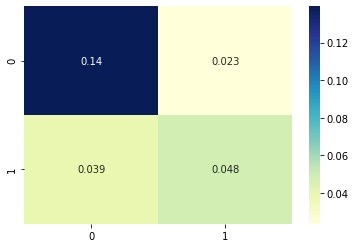

In [33]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predict) / len(y), cmap='YlGnBu', annot=True)

###### X-axis is predicted value
###### Y-axis is real value

##### Step5. [Normalization using MinmaxScaler and rebuild LoR] 

##### Now, normalize your X_train and X_test values using MinmaxScaler 

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trained = scaler.fit_transform(X_train)
X_tested = scaler.transform(X_test)

In [35]:
X_trained.shape

(576, 8)

In [36]:
X_tested.shape

(192, 8)

##### Create a new LogisticRegression model, fit on normalized training set and predict on the normalized test set

In [37]:
from sklearn.linear_model import LogisticRegression
lmodel1 = LogisticRegression()

In [38]:
lmodel1.fit(X_trained, y_train)

LogisticRegression()

In [39]:
yn_predict = lmodel1.predict(X_tested)
yn_predict

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
lmodel1.score(X_trained, y_train)

0.7899305555555556

##### Precision score

In [41]:
from sklearn.metrics import precision_score
print(precision_score(y_test, yn_predict))

0.673469387755102


##### Recall score

In [42]:
from sklearn.metrics import recall_score
print(recall_score(y_test, yn_predict))

0.4925373134328358


##### Accuracy score
##### Which is 72% Accurate

In [43]:
from sklearn.metrics import accuracy_score
minmax_ascore=accuracy_score(y_test, yn_predict)

In [44]:
minmax_ascore

0.7395833333333334

##### AUC score
##### AUC is the percentage of the ROC plot that is underneath the curve

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
lgr_auc=roc_auc_score(y_test, yn_predict)
lgr_auc1=('LoR minmax, AUC=',lgr_auc)
lgr_auc1

('LoR minmax, AUC=', 0.6822686567164179)

##### Step6. [Normalization using StandardScaler and rebuild LoR] 

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs_trained = scaler.fit_transform(X_train)
Xs_tested = scaler.transform(X_test)

In [48]:
Xs_trained.shape

(576, 8)

In [49]:
Xs_tested.shape

(192, 8)

In [50]:
from sklearn.linear_model import LogisticRegression
lmodel2 = LogisticRegression()

In [51]:
lmodel2.fit(Xs_trained, y_train)

LogisticRegression()

In [52]:
ys_predict = lmodel2.predict(Xs_tested)
ys_predict

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
lmodel2.score(Xs_trained, y_train)

0.7795138888888888

##### Precision score

In [54]:
from sklearn.metrics import precision_score
print(precision_score(y_test, ys_predict))

0.6851851851851852


##### Recall score

In [55]:
from sklearn.metrics import recall_score
print(recall_score(y_test, ys_predict))

0.5522388059701493


##### Accuracy score
##### Which is 75% Accurate

In [56]:
from sklearn.metrics import accuracy_score
ss_ascore=accuracy_score(y_test, ys_predict)

In [57]:
ss_ascore

0.7552083333333334

##### AUC score
##### AUC is the percentage of the ROC plot that is underneath the curve

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
ss_auc=roc_auc_score(y_test, ys_predict)
ss_auc1=('AUC=',ss_auc)
ss_auc1

('AUC=', 0.7081194029850746)

##### Among the 3 models, which model gives better classification scores? 

In [60]:
print('StandardScaler:',ss_ascore)
print('MinmaxScaler:',minmax_ascore)
print('Logistic Regression Model:',lor_ascore)

StandardScaler: 0.7552083333333334
MinmaxScaler: 0.7395833333333334
Logistic Regression Model: 0.75


##### Step7. [Plot ROC curve] 

##### Plot ROC curve as shown below. You can use the MinmaxScaler scaled values of X_test for computing predict_proba() score.

In [61]:
from sklearn.metrics import roc_curve

In [62]:
predict_pb1 = lmodel1.predict_proba(X_tested)
fpr1, tpr1, threshold1 = roc_curve(y_test,predict_pb1[:,1], pos_label=1)

Text(0, 0.5, 'True Positive Rate')

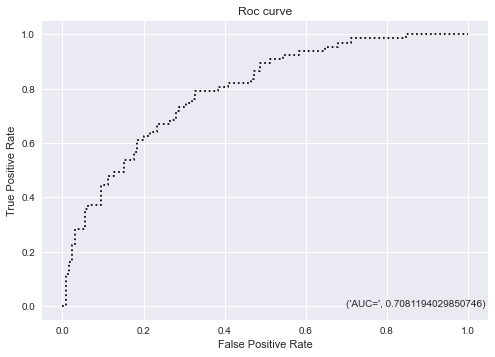

In [63]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.annotate(xy=[0.7,0], s=ss_auc1)
plt.plot(fpr1, tpr1, linestyle=':', color='black',label='Logistic Regression')
plt.title('Roc curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##### Step8. [Comparison with KNN classifier].

##### Create a KNN classifier with default values, fit on the scaled X using MinmaxScaler, predict and print classification metric scores.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
lmodel3 = KNeighborsClassifier(n_neighbors=3)

In [66]:
lmodel3.fit(X_trained,y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
knn_y_predict = lmodel3.predict(X_tested)
knn_y_predict

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

##### Precision score

In [68]:
from sklearn.metrics import precision_score
print(precision_score(y_test, knn_y_predict))

0.6271186440677966


##### Recall score

In [69]:
from sklearn.metrics import recall_score
print(recall_score(y_test, knn_y_predict))

0.5522388059701493


##### Accuracy score

In [70]:
from sklearn.metrics import accuracy_score
kn_ascore=accuracy_score(y_test, knn_y_predict)
kn_ascore

0.7291666666666666

##### AUC score

In [71]:
from sklearn.metrics import roc_auc_score
kn_auc=roc_auc_score(y_test, knn_y_predict)
kn_auc1=('KNN minmax, AUC=',kn_auc)
kn_auc1

('KNN minmax, AUC=', 0.6881194029850747)

##### Step9. [Update ROC curve]
##### Update your ROC curve, this time, with one more curve of KNN classifier,


In [72]:
predict_pb2 = lmodel3.predict_proba(X_tested)
fpr1,tpr1,threshold1 = roc_curve(y_test, predict_pb1[:,1],pos_label=1)
fpr2,tpr2,threshold2 = roc_curve(y_test, predict_pb2[:,1],pos_label=1)

Text(0, 0.5, 'True positive rate')

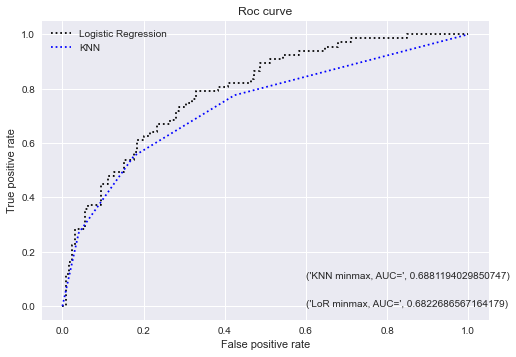

In [73]:
plt.plot(fpr1,tpr1,linestyle=':',color='black',label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle=':',color ='blue',label='KNN')
plt.annotate(xy=[0.6,0.1], s=kn_auc1)
plt.annotate(xy=[0.6,0], s=lgr_auc1)
plt.legend(loc='best')
plt.title('Roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

##### Step10. [Regularization]
##### In order to reduce overfitting of your data, you will use LogisticRegressionCV model with L1 and L2 regularization parameters. Create both models using the following statements

In [74]:
from sklearn.linear_model import LogisticRegressionCV

In [75]:
lmodel4 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear')
lmodel5 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2')

##### Perform fit using MinmaxScaler scaled values and predict

In [76]:
print(lmodel4.fit(X_trained,y_train))
print(lmodel5.fit(X_trained,y_train))

LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')
LogisticRegressionCV(cv=4)


In [77]:
lr_y_predict1 = lmodel4.predict(X_tested)
lr_y_predict2 = lmodel5.predict(X_tested)
print('Logistic RegressionCV L1:\n',lr_y_predict1)
print('--------------------------------------------------------------------------')
print('Logistic RegressionCV L2:\n',lr_y_predict2)

Logistic RegressionCV L1:
 [0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0]
--------------------------------------------------------------------------
Logistic RegressionCV L2:
 [0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0]


In [78]:
from sklearn.metrics import roc_auc_score
lrp_auc=roc_auc_score(y_test, lr_y_predict1)
lrp1_auc=('LoR L1 minmax, AUC=',lrp_auc)
lrp1_auc

('LoR L1 minmax, AUC=', 0.6748059701492537)

In [79]:
from sklearn.metrics import roc_auc_score
lrp_auc2=roc_auc_score(y_test, lr_y_predict2)
lrp2_auc=('LoR L2 minmax, AUC=',lrp_auc2)
lrp2_auc

('LoR L2 minmax, AUC=', 0.6931940298507463)

##### Step11. [Update ROC curve]
##### Update your ROC curve, this time, with two more curves

In [80]:
predict_pb3 = lmodel4.predict_proba(X_tested)
predict_pb4 = lmodel5.predict_proba(X_tested)
fpr1,tpr1,thresh1 = roc_curve(y_test, predict_pb1[:,1], pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test, predict_pb2[:,1], pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test, predict_pb3[:,1], pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test, predict_pb4[:,1], pos_label=1)

Text(0, 0.5, 'True  Positive Rate')

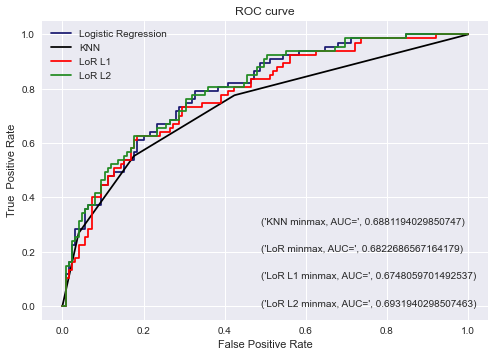

In [90]:
plt.plot(fpr1,tpr1,linestyle='-',color='midnightblue', label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='-',color='black', label='KNN')
plt.plot(fpr3,tpr3,linestyle='-',color='red', label='LoR L1')
plt.plot(fpr4,tpr4,linestyle='-',color='forestgreen', label='LoR L2')
plt.annotate(xy=[0.49,0.3], s=kn_auc1)
plt.annotate(xy=[0.49,0.2], s=lgr_auc1)
plt.annotate(xy=[0.49,0.1], s=lrp1_auc)
plt.annotate(xy=[0.49,0], s=lrp2_auc)
plt.legend(loc='best')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')

##### Logistic Regression L2 Minmax gives 69% of AUC score so this shows it is the best score